In [147]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from numpy import pi as π
from scipy.integrate import quad, simps

In [148]:
from scipy.stats import truncexpon,expon

In [149]:
x = 3*np.random.normal(size=10000) + 3

In [150]:
def normal(x,λ,σ):
    return 1.0/np.sqrt(2*π*σ**2)*np.exp(-(x-λ)**2/(2*σ**2))

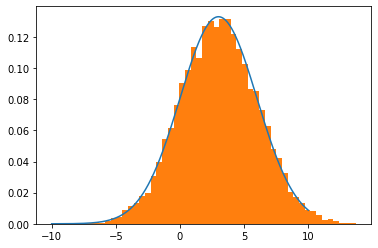

In [151]:
tx = np.linspace(-10,10,1000)
plt.plot(tx,normal(tx,3,3))
plt.hist(x, density=True, bins=50) ;

In [160]:
def trunc_exp(x,b,scale):
    return np.exp(-x/scale)/(1.0-np.exp(-b/scale))/scale

In [169]:
b = 2
scale = 6
r = truncexpon.rvs(b=b/scale,scale=scale,size=1000000)
#r = -r + b
tr = np.linspace(0,b,1000)

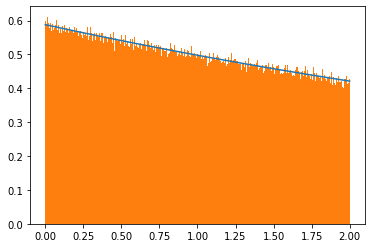

In [170]:
plt.plot(tr,trunc_exp(tr,b,scale));
plt.hist(r, density=True, bins=500);
#plt.yscale('log')

In [168]:
x = 0
b = 1
scale = 2
print("Homemade: %.8f"%(trunc_exp(x,b,scale)))
print("truncexpon.pdf: %.8f"%truncexpon.pdf(x,b,scale=scale))
print("truncexpon.pdf: %.8f"%truncexpon.pdf(x,b/scale,scale=scale))

Homemade: 1.27074704
truncexpon.pdf: 0.79098835
truncexpon.pdf: 1.27074704


1.0000203897302558
1.0000077461963977


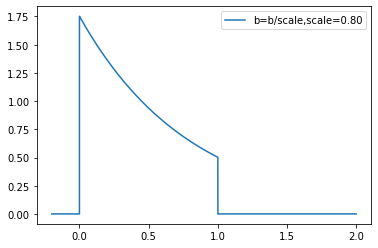

In [133]:
b = 1
x = np.linspace(-0.2,2*b,100000)
scale = 0.8

y1 = truncexpon.pdf(x,b,scale=scale)
y2 = truncexpon.pdf(x,b/scale,scale=scale)

# Check normalizations
print(simps(y1,x))
print(simps(y2,x))

#plt.plot(x,y1,label="b=b,scale=%.2f"%scale)
plt.plot(x,y2,label="b=b/scale,scale=%.2f"%scale)
plt.legend();